***
# **<center><span style='color:crimson'><font size="7">STEP-1</font></span></center>**
# *<center><span style='color:darkcyan'>Web Scraping</span></center>*
***

### NOTE: Web Scraping (also termed Screen Scraping, Web Data Extraction, Web Harvesting etc.) is a technique used to automatically extract large amounts of data from websites and save it to a file or database. The data scraped will usually be in tabular or spreadsheet format.

## Importing Libraries for webscraping: 

In [5]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

## Defining a get_jobs function to scrap data from 'www.glassdoor.com' website:

In [6]:
def get_jobs(keyword, num_jobs, verbose, path, slp_time): # path is webdriver path
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)

    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=" + keyword + "&sc.keyword=" + keyword + "&locT=&locId=&jobType="
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:
        time.sleep(slp_time)
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click()  # clicking to the X.
            print(' x out worked')
        except NoSuchElementException:
            print(' x out failed')
            pass

        job_buttons = driver.find_elements_by_class_name(
            "jl") 
        for job_button in job_buttons:

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click() 
            time.sleep(1)
            collected_successfully = False

            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 

            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 

            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    headquarters = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath(
                        './/div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException: 
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title": job_title,
                         "Salary Estimate": salary_estimate,
                         "Job Description": job_description,
                         "Rating": rating,
                         "Company Name": company_name,
                         "Location": location,
                         "Headquarters": headquarters,
                         "Size": size,
                         "Founded": founded,
                         "Type of ownership": type_of_ownership,
                         "Industry": industry,
                         "Sector": sector,
                         "Revenue": revenue,
                         "Competitors": competitors})

        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs,len(jobs)))
            break

    return pd.DataFrame(jobs) 

## Exporting the dataset:

In [ ]:
scraped_data = get_jobs('data scientist', 1000 , 0, 'D:\Python\Project ML\chromedriver.exe' , 60)
scraped_data.to_csv(r'C:\Users\upkri\Desktop\ML Project\Datasets\glassdoor_jobs.csv', index= False)

***
# **<center><span style='color:crimson'><font size="7">STEP-2</font></span></center>**
# *<center><span style='color:darkcyan'>Exploring the web-scraped dataset</span></center>*
***

### Importing the Libraries and Dataset:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv(r"C:\Users\upkri\Desktop\ML Project\Datasets\glassdoor_jobs.csv")
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

***
# **<center><span style='color:crimson'><font size="7">STEP-3</font></span></center>**
# *<center><span style='color:darkcyan'>Data Cleaning</span></center>*
***

## Salary parsing:

In [11]:
print(df.shape)
df = df[df['Salary Estimate'] != '-1']
print(df.shape)

(956, 15)
(742, 15)


In [12]:
salary=df['Salary Estimate'].apply(lambda x : x.split('(')[0])
minus_kd=salary.apply(lambda x : x.replace('K','').replace('$',''))
rem_hourly=minus_kd.apply(lambda x : x.lower().replace('per hour','').replace('employer provided salary:',''))
df['employer_provided'] = salary.apply(lambda x : 'YES' if 'employer provided salary:' in x.lower() else 'NO')
df['min_salary']=rem_hourly.apply(lambda x : int(x.split('-')[0]))
df['max_salary']=rem_hourly.apply(lambda x : int(x.split('-')[1]))
df['avg_salary']=(df.min_salary+df.max_salary)/2
df[['min_salary','max_salary','avg_salary']].head()

,min_salary,max_salary,avg_salary
0,53,91,72.0
1,63,112,87.5
2,80,90,85.0
3,56,97,76.5
4,86,143,114.5


## Company name text only:

In [13]:
df['Company Name'] = df.apply(lambda x : x['Company Name'] if x['Rating'] < 0 else x['Company Name'][: -4] , axis = 1)
df[['Company Name']].head()

,Company Name
0,Tecolote Research
1,University of Maryland Medical System
2,KnowBe4
3,PNNL
4,Affinity Solutions


## State field:

In [14]:
df['Job_State']=df['Location'].apply(lambda x : x.split(',')[1])
df['Head_Location']=df['Headquarters'].apply(lambda x : x.split(',')[-1])
df['same_state']=df.apply(lambda x : 'YES' if x.Job_State == x.Head_Location else 'NO', axis = 1)

## Age of company:

In [15]:
df['Company_Age']=df.apply(lambda x : 0 if x.Founded == -1 else ( 2021 - x.Founded) , axis = 1)
# x : '-1' to 0

## Parsing of job description (python, r studio etc.):

In [16]:
df[['Job Description']].head()

,Job Description
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu..."
1,What You Will Do:\n\nI. General Summary\n\nThe...
2,"KnowBe4, Inc. is a high growth information sec..."
3,*Organization and Job ID**\nJob ID: 310709\n\n...
4,Data Scientist\nAffinity Solutions / Marketing...


In [17]:
df['python']=df['Job Description'].apply(lambda x : 'YES' if 'python' in x.lower() else 'NO')
df['rstudio']=df['Job Description'].apply(lambda x : 'YES' if 'r studio' in x.lower() or 'r-studio' in x.lower()  else 'NO' )
df['spark']=df['Job Description'].apply(lambda x : 'YES' if 'spark' in x.lower() or 'apache' in x.lower()  else 'NO' )
df['aws']=df['Job Description'].apply(lambda x : 'YES' if 'aws' in x.lower() or 'amazon web service' in x.lower()  else 'NO' )
df['excel']=df['Job Description'].apply(lambda x : 'YES' if 'excel' in x.lower() or 'ms-excel' in x.lower()  else 'NO' ) 

In [18]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Job_State', 'Head_Location', 'same_state', 'Company_Age', 'python',
       'rstudio', 'spark', 'aws', 'excel'],
      dtype='object')

In [19]:
df_out=df.drop(['Unnamed: 0'] , axis = 1)
df_out.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Job_State,Head_Location,same_state,Company_Age,python,rstudio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,NM,CA,NO,48,YES,NO,NO,NO,YES
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,MD,MD,YES,37,YES,NO,NO,NO,NO
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,FL,FL,YES,11,YES,NO,YES,NO,YES
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,WA,WA,YES,56,YES,NO,NO,NO,NO
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,NY,NY,YES,23,YES,NO,NO,NO,YES


## Exporting cleaned data:

In [20]:
df_out.to_csv(r'C:\Users\upkri\Desktop\ML Project\Datasets\salary_data_cleaned.csv', index= False)

***
# **<center><span style='color:crimson'><font size="7">STEP-4</font></span></center>**
# *<center><span style='color:darkcyan'>Exploratory Data Analysis</span></center>*
***

## Importing the cleaned data:

In [21]:
df=pd.read_csv(r"C:\Users\upkri\Desktop\ML Project\Datasets\salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Job_State,Head_Location,same_state,Company_Age,python,rstudio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,NM,CA,NO,48,YES,NO,NO,NO,YES
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,MD,MD,YES,37,YES,NO,NO,NO,NO
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,FL,FL,YES,11,YES,NO,YES,NO,YES
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,WA,WA,YES,56,YES,NO,NO,NO,NO
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,NY,NY,YES,23,YES,NO,NO,NO,YES


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  employer_provided  742 non-null    object 
 15  min_salary         742 non-null    int64  
 16  max_salary         742 non

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Job_State', 'Head_Location', 'same_state', 'Company_Age', 'python',
       'rstudio', 'spark', 'aws', 'excel'],
      dtype='object')

## Job title and seniority Simplifier:

In [24]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'analytics' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [25]:
df['job_simp']=df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist               279
na                           172
data analyst                 130
data engineer                119
machine learning engineer     22
director                      12
manager                        8
Name: job_simp, dtype: int64

In [26]:
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [27]:
df.Job_State.value_counts()[:20]

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 IN     10
 UT     10
 AZ      9
Name: Job_State, dtype: int64

##  Fixing state 'Los Angeles':

In [28]:
df['Job_State'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [29]:
df['job_state']=df.Job_State.apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA' )
df.drop('Job_State',axis=1,inplace=True)

##  Job description length: 

In [30]:
df['desc_length'] = df['Job Description'].apply(lambda x : len(x))
df[['desc_length']].head()

,desc_length
0,2536
1,4783
2,3461
3,3883
4,2728


##  Competitor count:

In [31]:
df['num_comp']=df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)

In [32]:
df.num_comp.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

## Converting hourly wages to annual salary approximately:

In [33]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 'YES' if 'per hour' in x.lower() else 'NO')
df['min_salary']=df.apply(lambda x : x.min_salary*(52*40/1000) if x.hourly=='YES' else x.min_salary , axis=1)
df['max_salary']=df.apply(lambda x : x.max_salary*(52*40/1000) if x.hourly=='YES' else x.max_salary , axis=1)
df['avg_salary']=df.apply(lambda x : x.avg_salary*(52*40/1000) if x.hourly=='YES' else x.avg_salary , axis=1)
df[df.hourly == 'YES'][[ 'hourly' , 'min_salary' , 'max_salary', 'avg_salary']].head()

,hourly,min_salary,max_salary,avg_salary
165,YES,35.36,49.92,42.64
177,YES,43.68,70.72,57.20
197,YES,37.44,52.00,44.72
202,YES,43.68,70.72,57.20
210,YES,31.20,52.00,41.60


In [34]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,Company_Age,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,74.771752,128.226900,101.499326,47.591644,3869.545822,1.053908
std,0.801210,497.183763,30.926958,45.110814,37.463032,53.778815,1521.495868,1.384239
min,-1.000000,-1.000000,15.000000,16.000000,15.500000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,52.000000,96.000000,73.500000,12.000000,2801.000000,0.000000
50%,3.700000,1988.000000,69.500000,124.000000,97.500000,25.000000,3731.000000,0.000000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,60.000000,4740.000000,3.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,277.000000,10051.000000,4.000000


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Head_Location', 'same_state', 'Company_Age', 'python', 'rstudio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'job_state',
       'desc_length', 'num_comp', 'hourly'],
      dtype='object')

## Data visualization of Numerical variables using Histogram:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  employer_provided  742 non-null    object 
 15  min_salary         742 non-null    float64
 16  max_salary         742 non

In [37]:
df.select_dtypes(['int64','float64']).columns

Index(['Rating', 'Founded', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Age', 'desc_length', 'num_comp'],
      dtype='object')

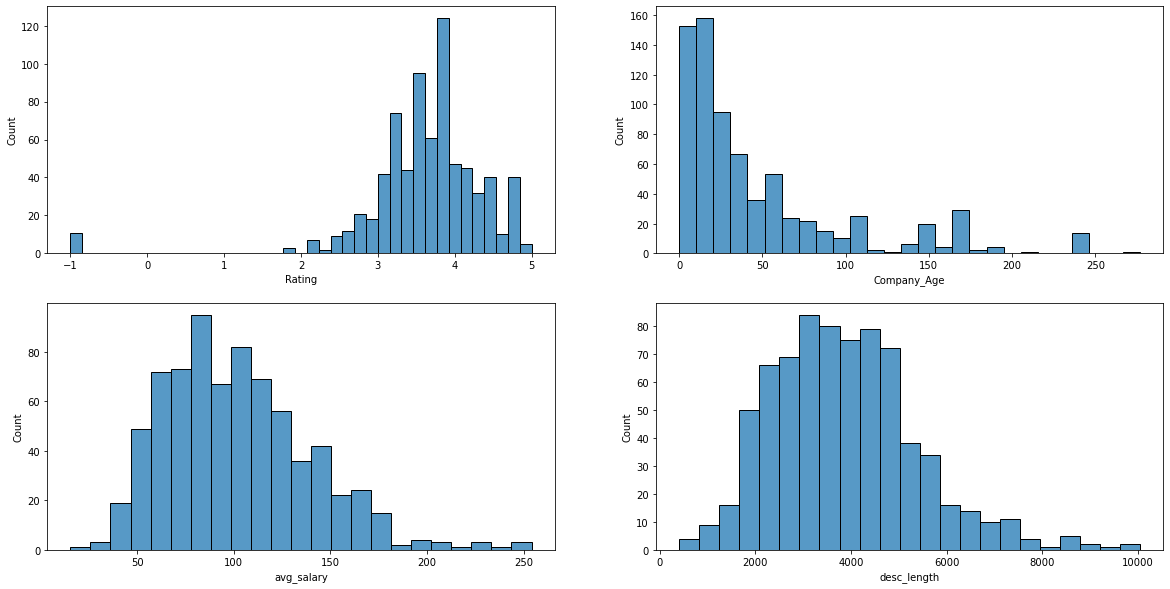

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(df.Rating)
plt.subplot(2,2,2)
sns.histplot(df.Company_Age)
plt.subplot(2,2,3)
sns.histplot(df.avg_salary)
plt.subplot(2,2,4)
sns.histplot(df.desc_length)
plt.show()

## Data Visualization of Numerical variables using Boxplot:

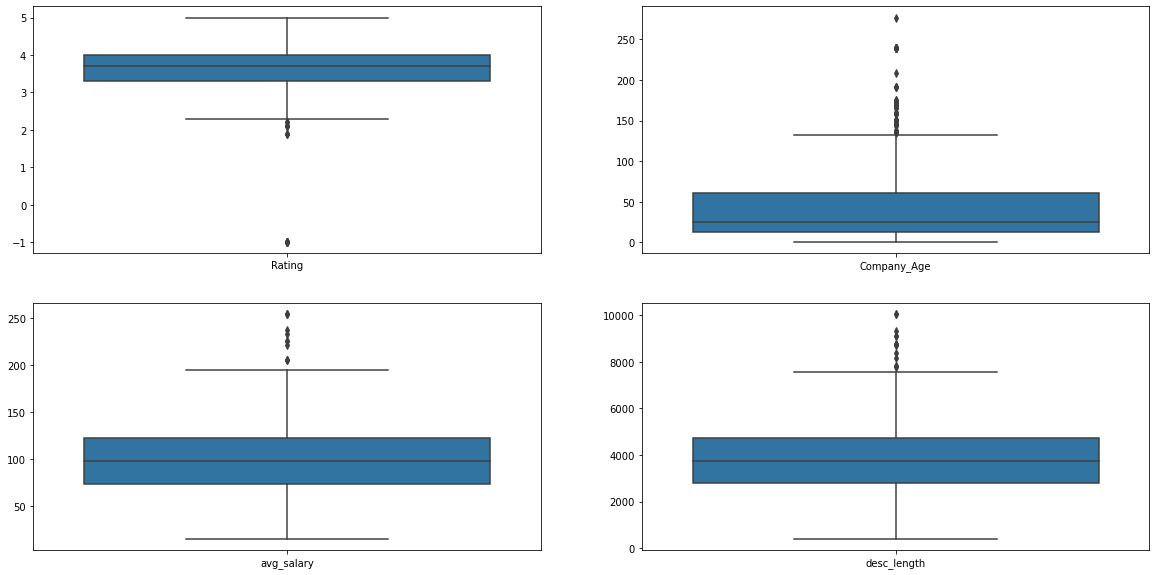

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data = df[['Rating']])
plt.subplot(2,2,2)
sns.boxplot(data = df[['Company_Age']])
plt.subplot(2,2,3)
sns.boxplot(data = df[['avg_salary']])
plt.subplot(2,2,4)
sns.boxplot(data = df[['desc_length']])
plt.show()

## Checking the correlation among numerical variables:

In [40]:
df[['Company_Age' , 'avg_salary' , 'Rating' , 'desc_length','num_comp']].corr()

,Company_Age,avg_salary,Rating,desc_length,num_comp
Company_Age,1.000000,0.022177,0.021655,0.163911,0.126687
avg_salary,0.022177,1.000000,0.012429,0.069742,0.082339
Rating,0.021655,0.012429,1.000000,-0.012281,0.027190
desc_length,0.163911,0.069742,-0.012281,1.000000,0.104620
num_comp,0.126687,0.082339,0.027190,0.104620,1.000000


<AxesSubplot:>

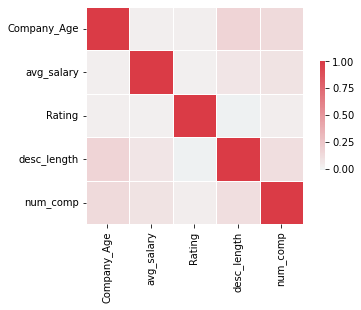

In [41]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company_Age','avg_salary','Rating','desc_length','num_comp']].corr(),vmax=1, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### So, There is no significant correlation among input variables.That is good for regression model to use.

## Data Visualization of Catagorical variables using Bargraph:

In [42]:
df.select_dtypes('object').columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'employer_provided',
       'Head_Location', 'same_state', 'python', 'rstudio', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'job_state', 'hourly'],
      dtype='object')

In [43]:
df_cat=df[['job_simp','job_state','Head_Location', 'same_state','Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'python', 'rstudio','spark', 'aws', 'excel','employer_provided', 'seniority']]

graph for job_simp: total = 7


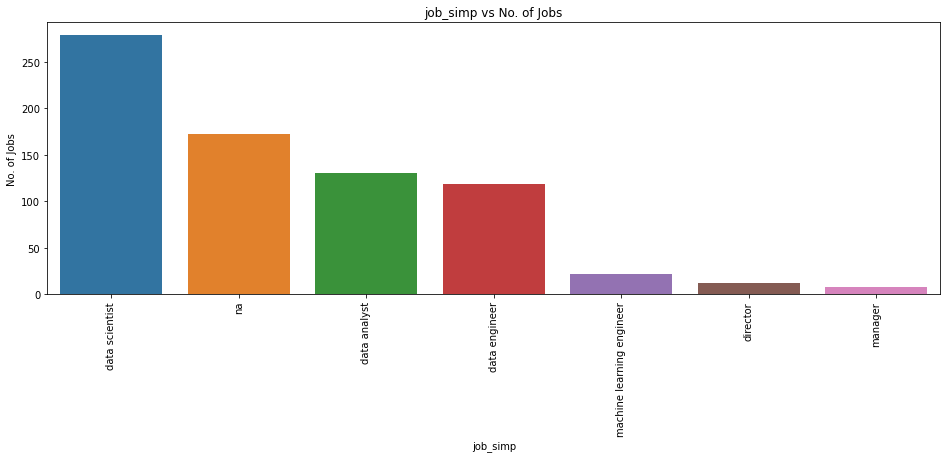

graph for job_state: total = 37


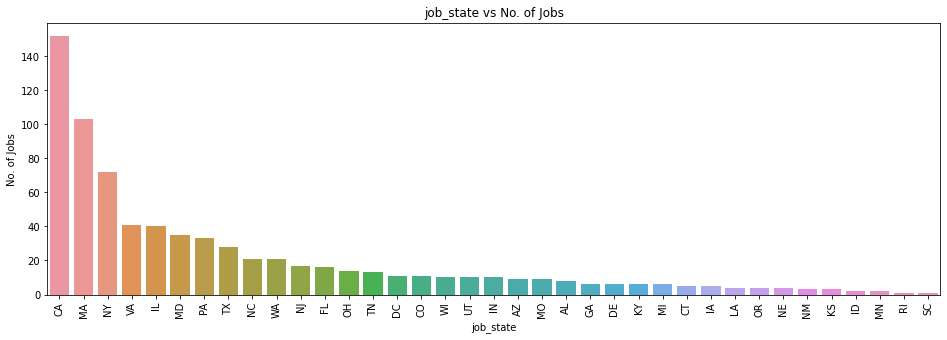

graph for Head_Location: total = 47


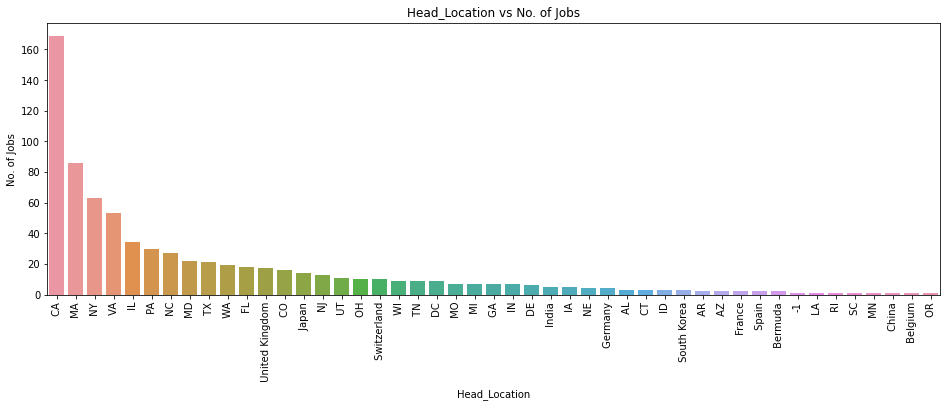

graph for same_state: total = 2


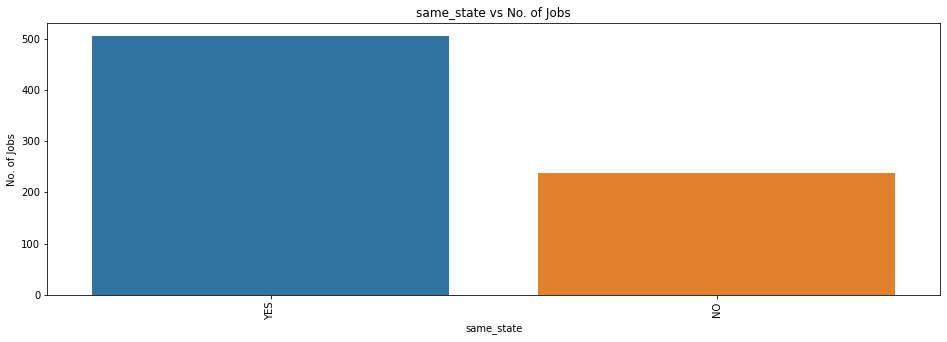

graph for Size: total = 9


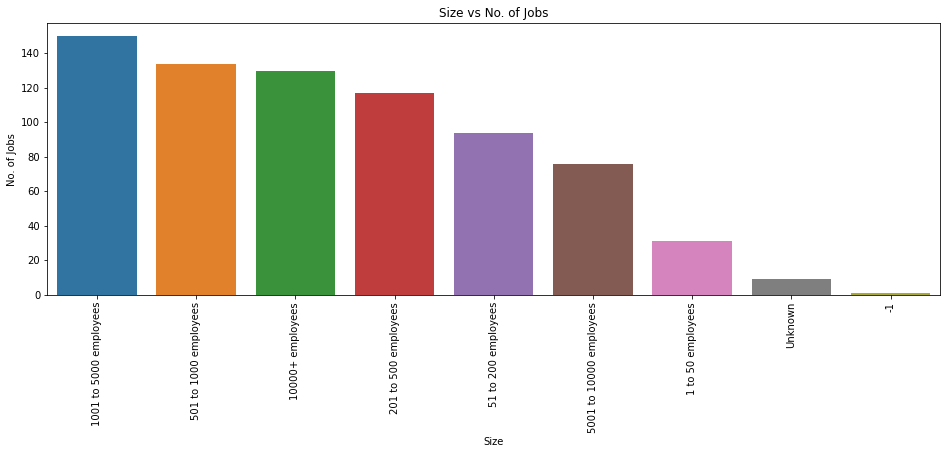

graph for Type of ownership: total = 11


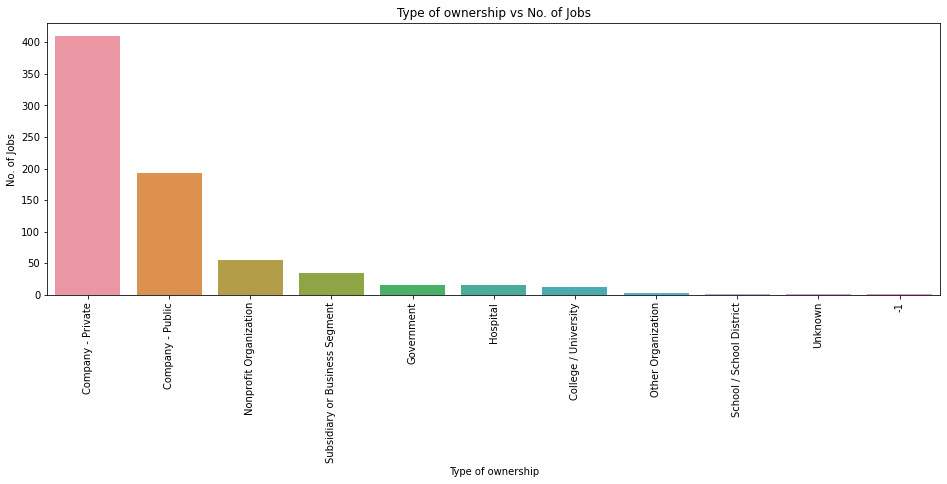

graph for Industry: total = 50


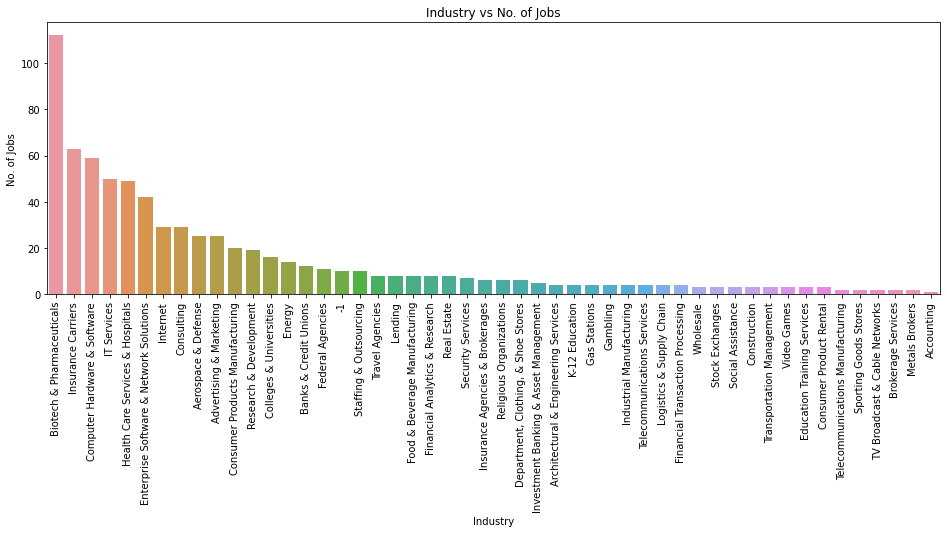

graph for Sector: total = 25


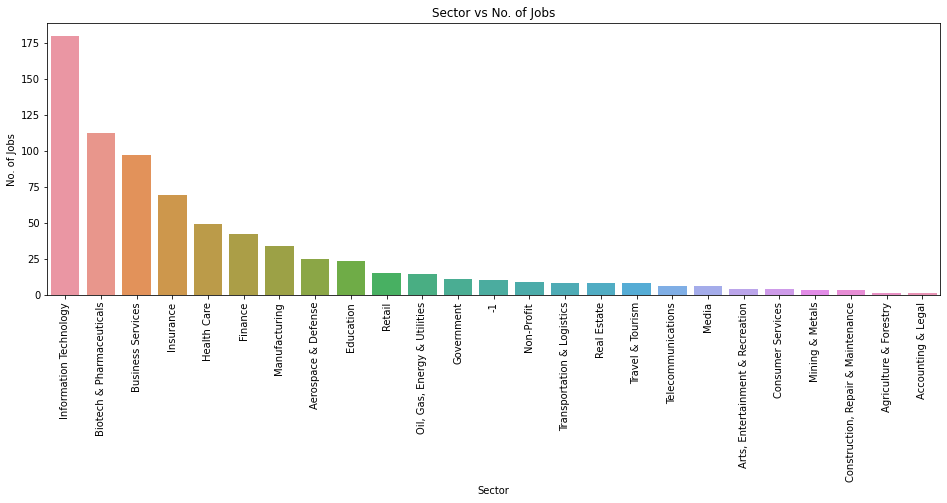

graph for Revenue: total = 14


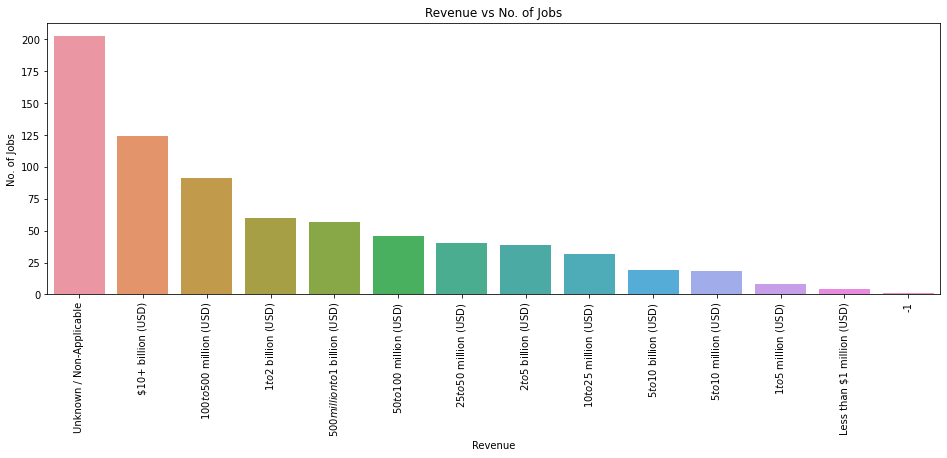

graph for python: total = 2


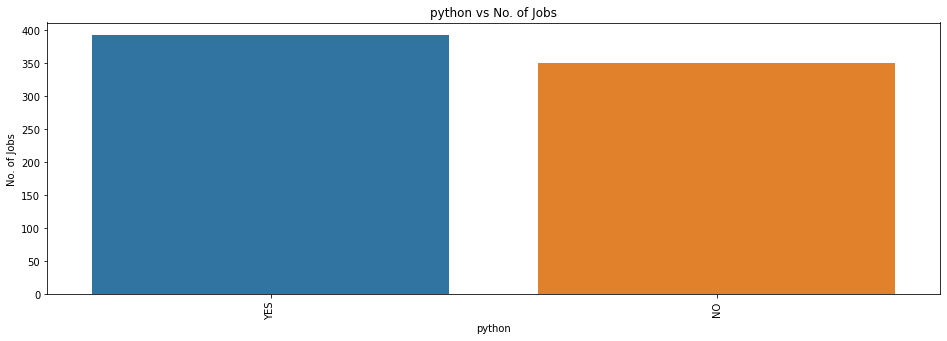

graph for rstudio: total = 2


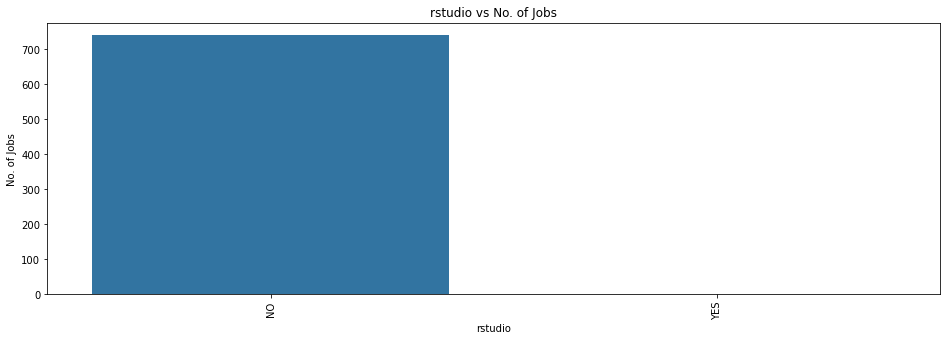

graph for spark: total = 2


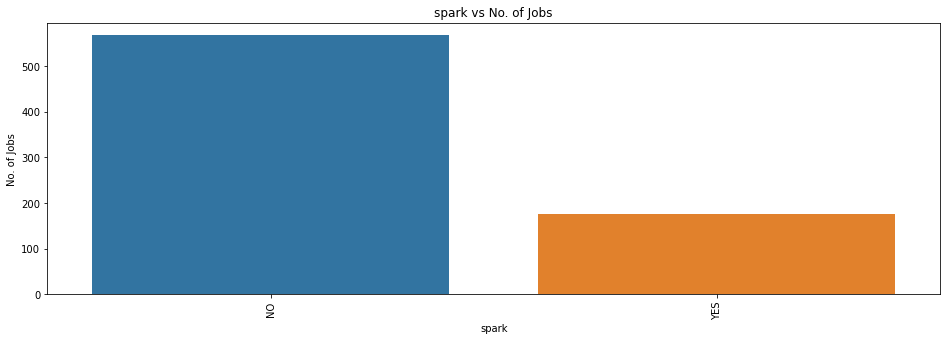

graph for aws: total = 2


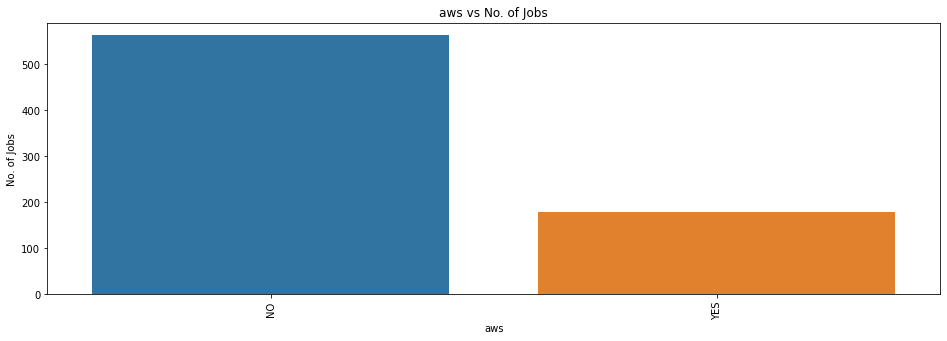

graph for excel: total = 2


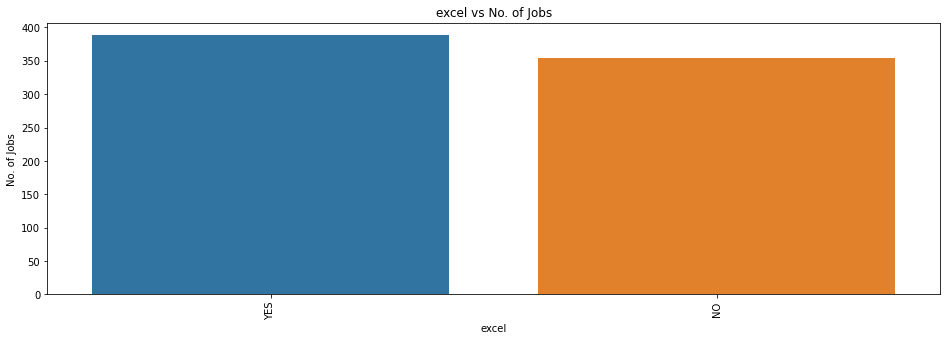

graph for employer_provided: total = 2


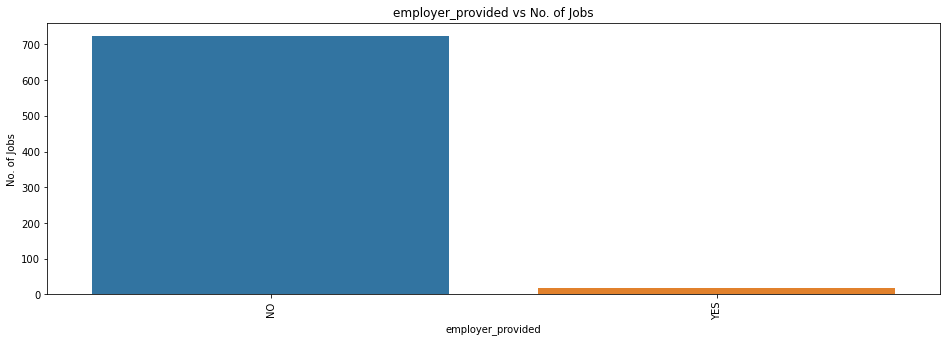

graph for seniority: total = 3


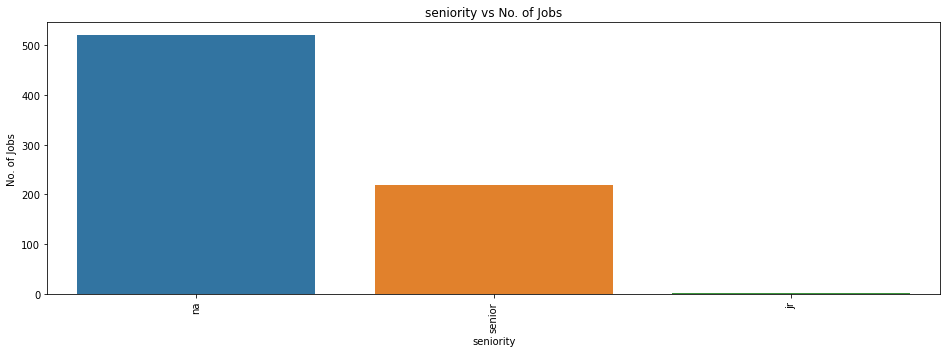

In [44]:
for i in df_cat.columns:
    plt.figure(figsize=(16,5))
    cat_num = df_cat[i].value_counts()[:50]
    plt.title(f"{i} vs No. of Jobs")
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.ylabel("No. of Jobs")
    plt.xlabel(i)
    plt.show()

## Average Salary depending upon the different input variables:

### Data Visualization using pivot tables:

In [45]:
pd.pivot_table(df , index ='job_simp' , values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_simp,
director,164.291667
machine learning engineer,126.431818
data scientist,117.564516
manager,105.937500
data engineer,105.403361
na,88.615349
data analyst,70.205077


In [46]:
pd.pivot_table(df, index =['job_simp','seniority'] , values = 'avg_salary')

avg_salary
job_simp                  seniority            
data analyst              jr          56.500000
                          na          66.015306
                          senior      83.892258
data engineer             na          96.701220
                          senior     124.689189
data scientist            jr         106.500000
                          na         107.043011
                          senior     138.956522
director                  na         164.291667
machine learning engineer na         119.133333
                          senior     142.071429
manager                   na         105.937500
na                        na          79.507059
                          senior     109.066038

In [47]:
pd.pivot_table(df, index=['job_state','job_simp'] , values = 'avg_salary').sort_values('job_state' , ascending=False) 

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          data analyst     58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        data analyst     55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          data analyst     62.200000

[113 rows x 1 columns]

In [48]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

#### Avg salary of data scientists in different states:

In [49]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


## Data Visualization using Word Cloud:

### NOTE: Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [50]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download()

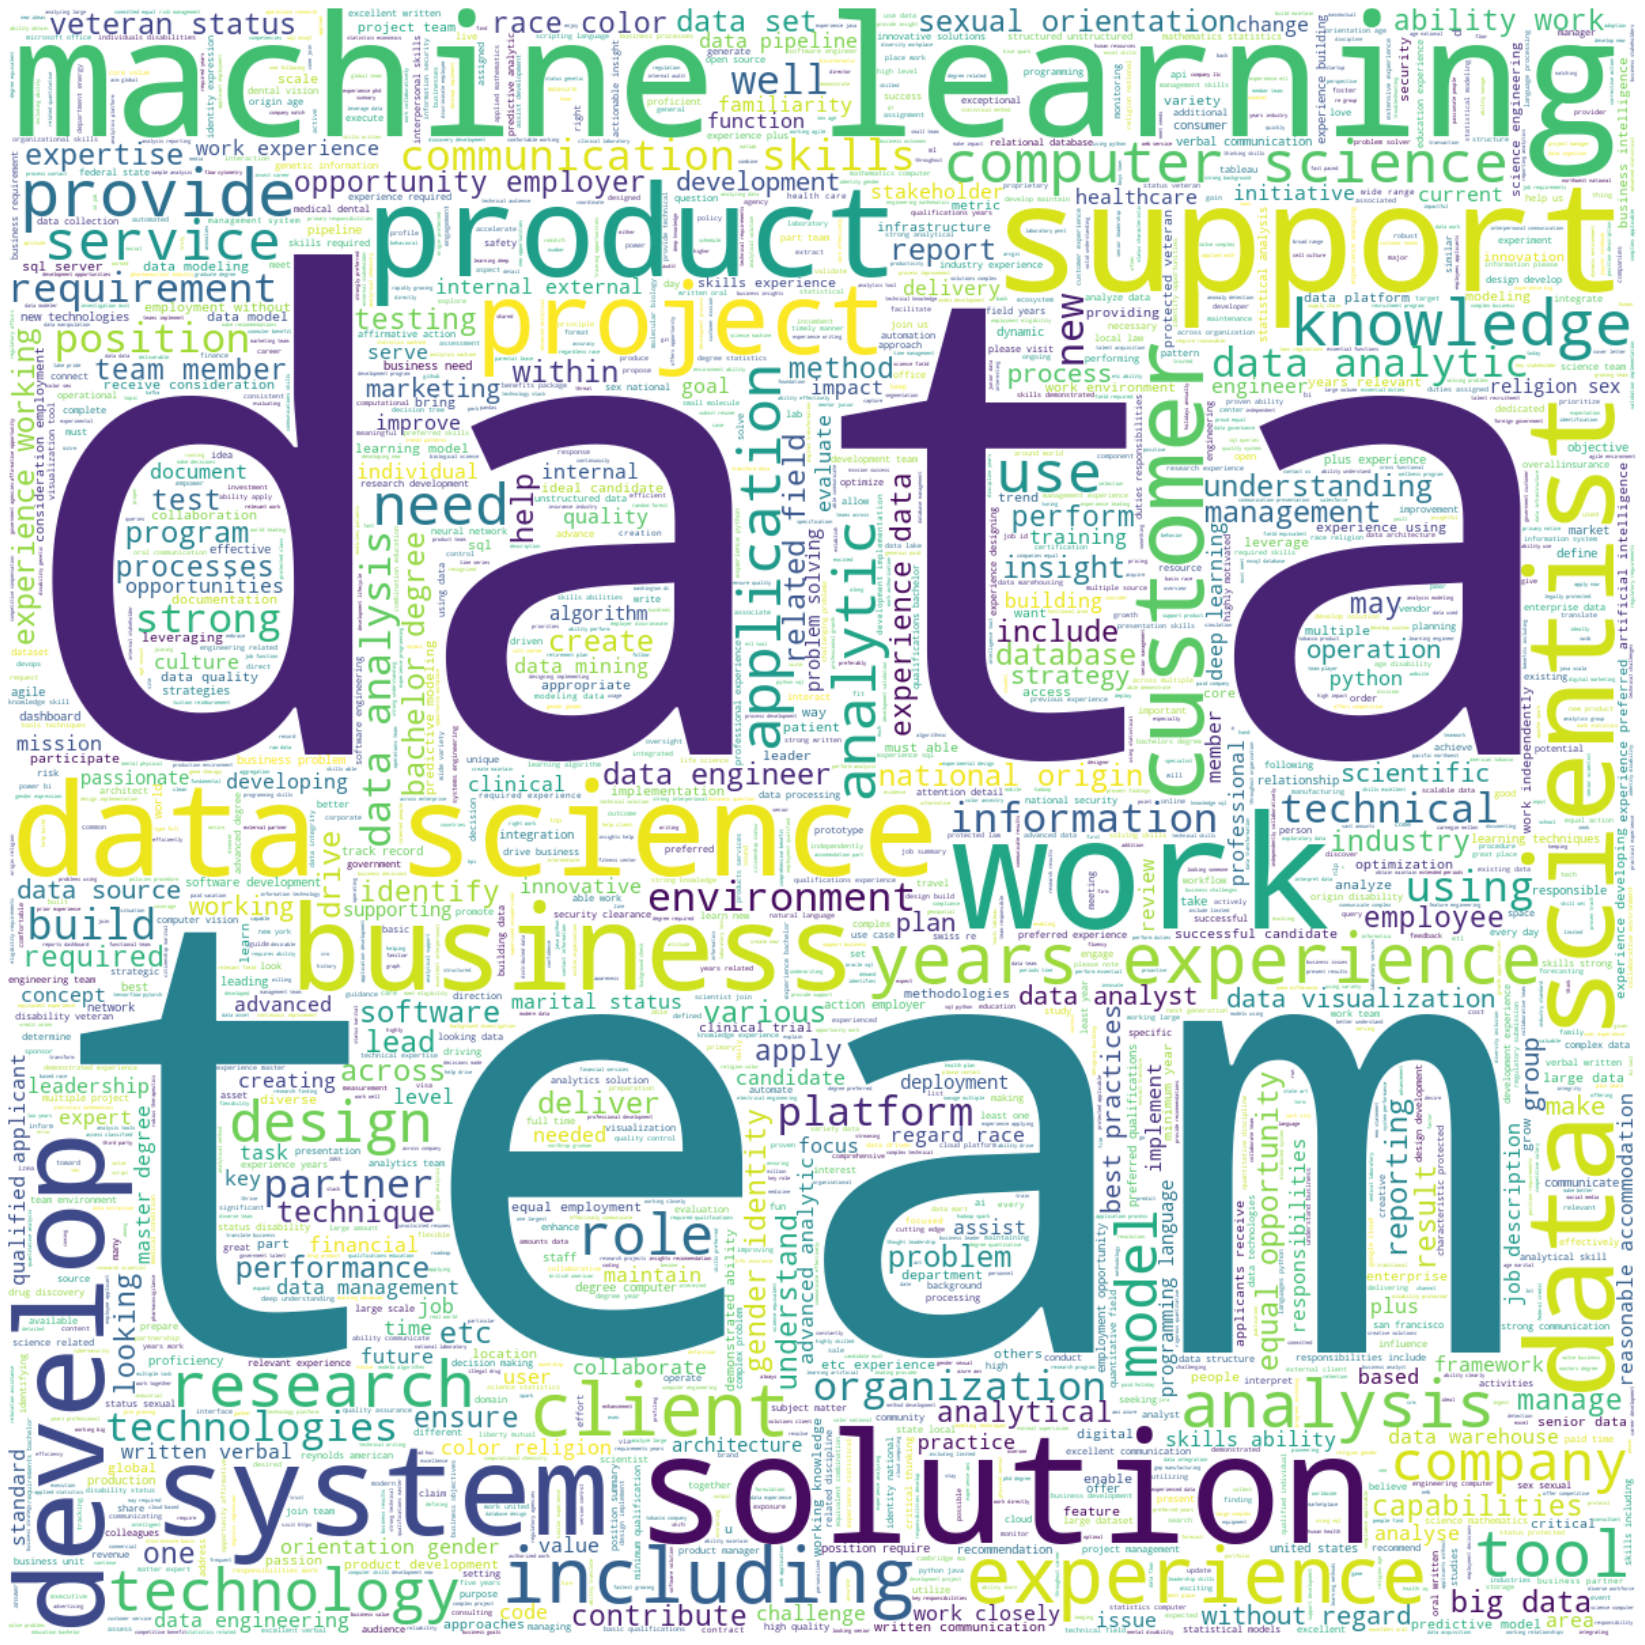

In [51]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1200, height = 1200)
wc.generate(text)

plt.figure(figsize=[30,30])
plt.imshow(interpolation="bilinear" , X=wc)
plt.axis('off')
plt.show()

## Exporting dataset after EDA:

In [52]:
df.to_csv(r'C:\Users\upkri\Desktop\ML Project\Datasets\EDA_data.csv', index= False)

***
# **<center><span style='color:crimson'><font size="7">STEP-5</font></span></center>**
# *<center><span style='color:darkcyan'>Data Pre-processing</span></center>*
***

## Importing the Dataset obtained after EDA:

In [53]:
df = pd.read_csv(r"C:\Users\upkri\Desktop\ML Project\Datasets\EDA_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  employer_provided  742 non-null    object 
 15  min_salary         742 non-null    float64
 16  max_salary         742 non

In [54]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Head_Location', 'same_state', 'Company_Age', 'python', 'rstudio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'job_state',
       'desc_length', 'num_comp', 'hourly'],
      dtype='object')

## Choosing relevant features:

In [55]:
df_model = df[['job_simp','avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','job_state','Head_Location','same_state','Company_Age','python','spark','aws','excel','seniority','employer_provided']]

## Encoding catagorical variables into numerical variables:

In [56]:
# get dummy data 
df_dum = pd.get_dummies(df_model,drop_first=True)
df_dum.head()

,avg_salary,Rating,num_comp,Company_Age,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_machine learning engineer,job_simp_manager,job_simp_na,...,Head_Location_ WI,Head_Location_-1,same_state_YES,python_YES,spark_YES,aws_YES,excel_YES,seniority_na,seniority_senior,employer_provided_YES
0,72.0,3.8,0,48,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,87.5,3.4,0,37,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,85.0,4.8,0,11,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,0,0
3,76.5,3.8,3,56,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,114.5,2.9,3,23,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0


***
# **<center><span style='color:crimson'><font size="7">STEP-6</font></span></center>**
# *<center><span style='color:darkcyan'>Model Training</span></center>*
***

### NOTE: As the target feature i.e. 'Salary' is a continuous variable. Hence I have performed regression analysis on the dataset.

## Feature Selection:

In [57]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary

## Splitting the dataset into the Training set and Test set in the ratio of 80% - 20%:

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Assessing the relevancy of the model:

In [59]:
# multiple linear regression 
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     7.987
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           8.63e-81
Time:                        10:14:53   Log-Likelihood:                -3271.5
No. Observations:                 742   AIC:                             6903.
Df Residuals:                     562   BIC:                             7733.
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.5211     23.751      1.790      0.074      -4.130      89.172
Rating                                                3.8498      2.019      1.907      0.057      -0.115       7.815
num_comp                                              2.3713      0.969      2.448      0.015       0.469       4.274
Company_Age                                           0.0355      0.041      0.861      0.390      -0.045       0.116
job_simp_data engineer                               26.4254      4.366      6.053      0.000      17.850      35.001
job_simp_data scientist                              34.2288      3.626      9.439      0.000      27.106      41.352
job_simp_director                                    74.9476      8.225      9.112      0.000      58.792      91.104
job_simp_machine learning engineer                   48.9490      7.327      6.680      0.000      34.557      63.341
job_simp_manager                                     31.6055      9.418      3.356      0.001      13.107      50.104
job_simp_na                                          14.3810      4.377      3.285      0.001       5.783      22.979
Size_1 to 50 employees                                1.0360      8.256      0.125      0.900     -15.181      17.253
Size_10000+ employees                                -1.6596      7.228     -0.230      0.818     -15.857      12.538
Size_1001 to 5000 employees                           2.3478      5.605      0.419      0.675      -8.661      13.357
Size_201 to 500 employees                            -0.4932      5.904     -0.084      0.933     -12.090      11.104
Size_5001 to 10000 employees                         -3.7762      7.072     -0.534      0.594     -17.667      10.115
Size_501 to 1000 employees                           -4.4362      6.036     -0.735      0.463     -16.291       7.419
Size_51 to 200 employees                              1.6151      6.516      0.248      0.804     -11.184      14.415
Size_Unknown                                         28.1048     14.257      1.971      0.049       0.102      56.107
Type of ownership_College / University               26.1254     18.449      1.416      0.157     -10.112      62.363
Type of ownership_Company - Private                   1.6122      6.775      0.238      0.812     -11.695      14.919
Type of ownership_Company - Public                    5.7907      7.228      0.801      0.423      -8.406      19.988
Type of ownership_Government                        -27.6341     16.586     -1.666      0.096     -60.212       4.944
Type of ownership_Hospital                           -5.2178     10.793     -0.483      0.629     -26.418      15.983
Type of ownersh

## R square value = 0.718
### which indicates the high correlation between the input variables and output variable and data is suitable for regression model.

## 1. Training the Multiple linear regression model:

### Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

### NOTE: This is the baseline model for any regression analysis problem. So i have choosen it first.

In [60]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f"CV score: {-1 * np.mean(cross_val_score(lm,X_train,y_train,scoring = 'neg_root_mean_squared_error', cv= 3))}")

CV score: 31.386717299186472


### NOTE: Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

## 2. Training the Lasso regression model:

### The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, 

### NOTE: I have choosen it because of the sparse data from many categorical variables, I thought a normalized regression like lasso would be effective.

### Selecting alpha value for best performance of Lasso regression model:

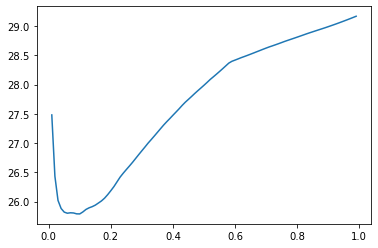

In [61]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(-1 * np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_root_mean_squared_error', cv= 3)))
    
plt.plot(alpha,error)

In [62]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == min(df_err.error)]

,alpha,error
9,0.1,25.788796


In [63]:
lm_l = Lasso(alpha=0.1)
lm_l.fit(X_train,y_train)
print(f"CV score: {-1 * np.mean(cross_val_score(lm_l,X_train,y_train,scoring = 'neg_root_mean_squared_error', cv= 3))}")

CV score: 25.78879592176916


## 3. Training the Random forest regressor model:

### Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

### NOTE: Again, with the sparsity associated with the data, I thought that this would be a good fit.

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(f"CV score: {-1 * np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_root_mean_squared_error', cv= 3))}")

CV score: 23.598836678250326


### Cross validataion score for:
Multiple Linear Regression Model: 31.386 </br>
Lasso Regression Model: 25.788 </br>
Random Forst Regressor Model: 23.598 </br>
Note: CV score indicate how well our model will perform on new data (test data).</br>
Because this CV score is calculated on the basis of Root Mean Sqaure error, hence lower CV score indicates better preformance.
### So, Random Forest Regressor Model has performed better than other two. I am going to optimize this model. 

***
# **<center><span style='color:crimson'><font size="7">STEP-7</font></span></center>**
# *<center><span style='color:darkcyan'>Model Optimization</span></center>*
***

## 4. Hyperparameter tuning of Random forest regressor model using GridsearchCV:

### NOTE: Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

In [65]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_root_mean_squared_error',cv=3)
gs.fit(X_train,y_train)

print(f"CV score: {-1 * gs.best_score_}")
print(gs.best_params_)

CV score: 23.175465695740794
{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 90}


### Test ensembles:

In [66]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf1 = rf.predict(X_test)
tpred_rf2 = gs.best_estimator_.predict(X_test)

***
 **<center><span style='color:crimson'><font size="7">STEP-8</font></span></center>**
# *<center><span style='color:darkcyan'>Model Evaluation and Comparison</span></center>*
***

## Comparison of different models depending on 'r-square value':

### R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.


In [67]:
from sklearn.metrics import r2_score
print(f"r2_score for Linear Regression model: {r2_score(y_test,tpred_lm).round(3)}")
print(f"r2_score for Lasso Regression model: {r2_score(y_test,tpred_lml).round(3)}")
print(f"r2_score for Random Forest Regressor model (before hypertuning): {r2_score(y_test,tpred_rf1).round(3)}")
print(f"r2_score for Random Forest Regressor model (after hypertuning): {r2_score(y_test,tpred_rf2).round(3)}")

r2_score for Linear Regression model: 0.487
r2_score for Lasso Regression model: 0.577
r2_score for Random Forest Regressor model (before hypertuning): 0.759
r2_score for Random Forest Regressor model (after hypertuning): 0.776


### NOTE: The greater r-square value indicates the high correlation between the input variables and output variable and data is suitable for regression model. 

## Comparison of different models depending on 'Root mean squared error':

### Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

In [68]:
from sklearn.metrics import mean_squared_error
print(f"RMSE for Linear Regression model: {mean_squared_error(y_test,tpred_lm,squared = False).round(3)}")
print(f"RMSE for Lasso Regression model: {mean_squared_error(y_test,tpred_lml,squared = False).round(3)}")
print(f"RMSE for Random Forest Regressor model (before hypertuning): {mean_squared_error(y_test,tpred_rf1,squared = False).round(3)}")
print(f"RMSE for Random Forest Regressor model (after hypertuning): {mean_squared_error(y_test,tpred_rf2,squared = False).round(3)}")

RMSE for Linear Regression model: 28.366
RMSE for Lasso Regression model: 25.747
RMSE for Random Forest Regressor model (before hypertuning): 19.43
RMSE for Random Forest Regressor model (after hypertuning): 18.728


### NOTE: Less RMSE means better performance of the model.

## Comparison Table:

In [71]:
data_com = {'Model':['Linear Regression','Lasso Regression','Random Forest Reg','Random Forest Reg (GridsearchCV)'],'CV Score':[31.38,25.78,23.59,23.17],'RMSE':[28.36,25.74,19.43,18.72],'R2 score':[0.487,0.577,0.759,0.776]}
comparison = pd.DataFrame(data_com)
comparison

,Model,CV Score,RMSE,R2 score
0,Linear Regression,31.38,28.36,0.487
1,Lasso Regression,25.78,25.74,0.577
2,Random Forest Reg,23.59,19.43,0.759
3,Random Forest Reg (GridsearchCV),23.17,18.72,0.776


## Plotting Bargraph for comparing all models:

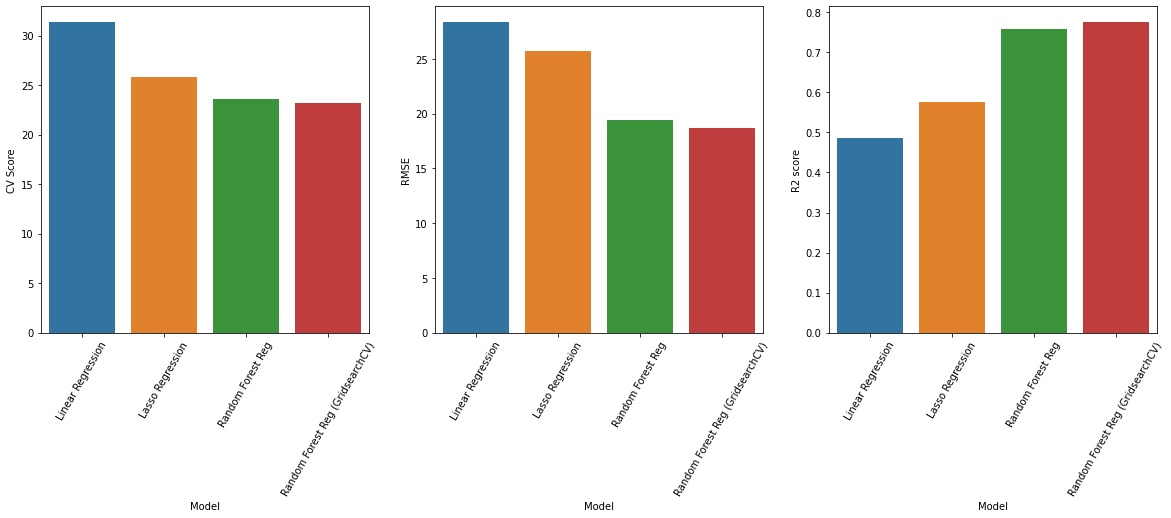

In [72]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
chart = sns.barplot(x= 'Model',y= 'CV Score' ,data = comparison)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.subplot(1,3,2)
chart = sns.barplot(x= 'Model',y= 'RMSE' ,data = comparison)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.subplot(1,3,3)
chart = sns.barplot(x= 'Model',y= 'R2 score' ,data = comparison)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

## Conclusion:
### Clearly Random Forest Regressor model with hypertuning outperformed other models (i.e. Multiple Linear Regression, Lasso Regression)

***

<center> *** </center>

***